# 데이터 셋업

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [3]:
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 1번 문제

In [2]:
drug_city = df[df['상권업종소분류명']=='약국']
drug_city['시도명'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

# 2번 문제

In [4]:
hos_drug = df[(df['상권업종소분류명']=='병원')| (df['상권업종소분류명']=='약국')]

In [5]:
vet = df[(df['상권업종소분류명']=='동물병원')]

<AxesSubplot:xlabel='경도', ylabel='위도'>

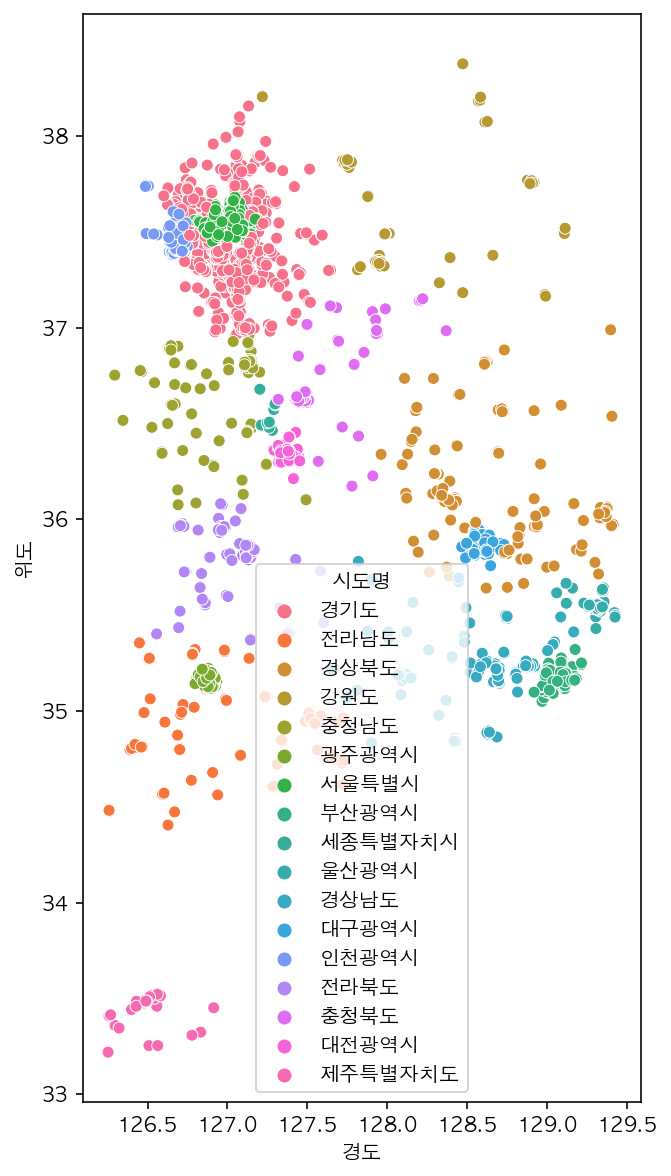

In [6]:
plt.figure(figsize=(5, 10))
sns.scatterplot(data=vet, x='경도', y='위도',hue='시도명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

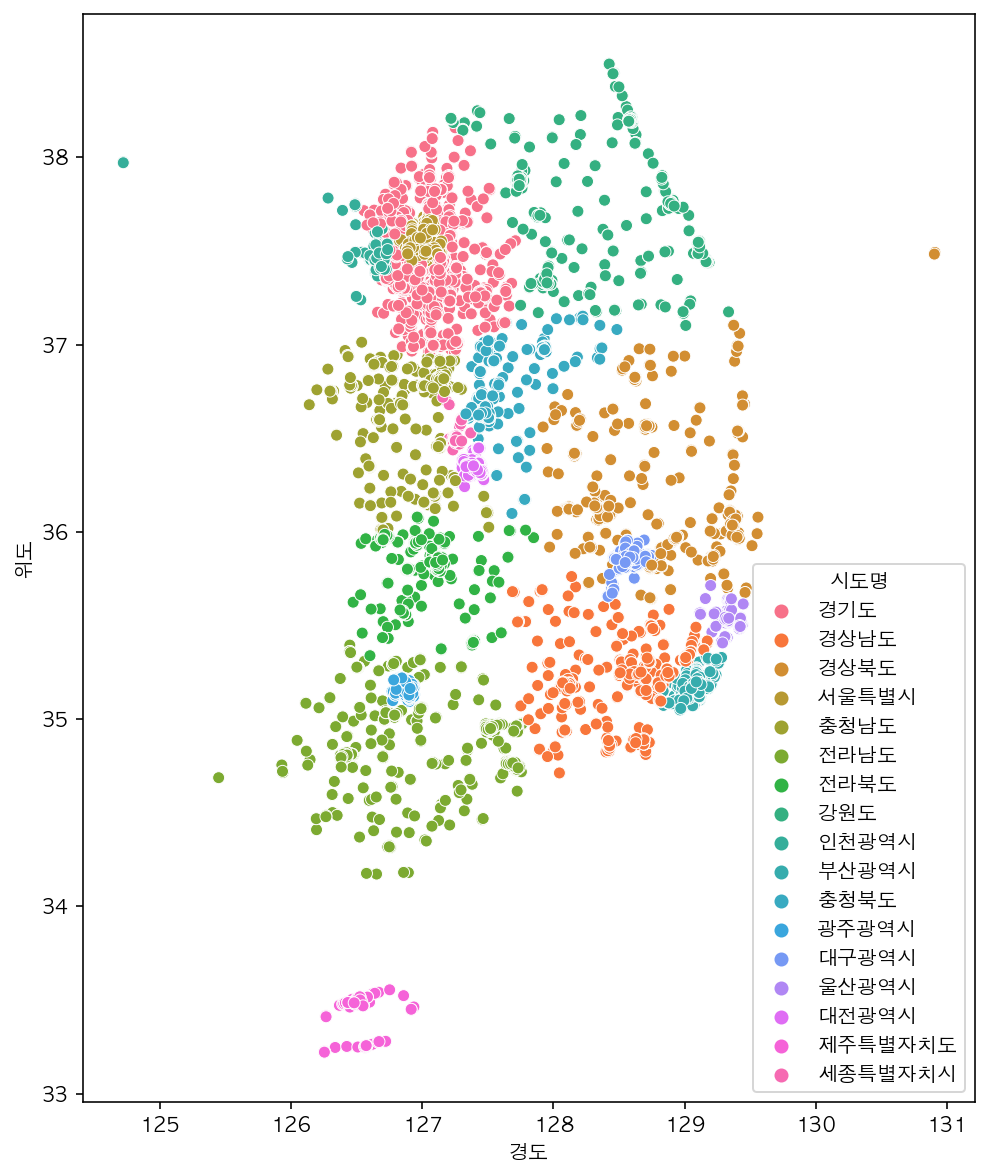

In [7]:
plt.figure(figsize=(8, 10))
sns.scatterplot(data=hos_drug, x='경도', y='위도',hue='시도명')

In [8]:
vet['시도명'].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

# 3번 문제

In [9]:
der=df[(df['시도명']=='서울특별시')&(df['상권업종소분류명'].str.contains('피부')|df['상권업종소분류명'].str.contains('성형'))]
hos=df[(df['시도명']=='서울특별시')&(df['상권업종중분류명']=='병원')]

In [10]:
der_gu = der['시군구명'].value_counts()
hos_gu = hos['시군구명'].value_counts()

In [12]:
total_gu = pd.concat([der_gu,hos_gu],axis=1)

In [15]:
total_gu.columns=['피부성형','전체병원']
total_gu['비율']=round(total_gu['피부성형']/total_gu['전체병원'],2)
total_gu

,피부성형,전체병원,비율
강남구,603,2550,0.24
서초구,200,1196,0.17
송파구,48,748,0.06
마포구,40,456,0.09
영등포구,39,516,0.08
강서구,38,579,0.07
광진구,37,600,0.06
강동구,37,494,0.07
중구,31,423,0.07
은평구,31,506,0.06


In [16]:
total_gu_sorted = total_gu.sort_values(by='비율', ascending=False)
total_gu_sorted

,피부성형,전체병원,비율
강남구,603,2550,0.24
서초구,200,1196,0.17
마포구,40,456,0.09
영등포구,39,516,0.08
서대문구,29,379,0.08
강서구,38,579,0.07
강동구,37,494,0.07
중구,31,423,0.07
양천구,26,398,0.07
중랑구,21,307,0.07


# 4번 문제

In [17]:
silver = df[df['상권업종소분류명']=='노인/치매병원']
silver.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132


In [18]:
map = folium.Map(location=[silver['위도'].mean(),silver['경도'].mean()],
                 zoom_start=7)

for n in silver.index:
    name= silver.loc[n,'상호명']
    address = silver.loc[n, '도로명주소']
    popup = f"{name}-{address}"
    location = [silver.loc[n, '위도'], silver.loc[n, '경도']]
    print(popup)
    folium.Marker(
        location = location,
        popup = popup,
        ).add_to(map)
    
map

다사랑요양병원-부산광역시 북구 덕천로 339
노경회-전라남도 광양시 진월면 용소길 7
일산카네이션너싱홈-경기도 고양시 일산동구 중산로 241
은성복지회-전라남도 순천시 조비길 298
하은실버홈-경상북도 상주시 낙동면 영남제일로 125-17
행복한쉼터-충청남도 아산시 음봉면 월암로201번길 28-12
안심노인주간보호센터사하점-부산광역시 사하구 다대낙조2길 3
원광효도요양병원-전라북도 군산시 조촌2길 18
신우재활요양병원-서울특별시 동대문구 한천로 207
청송노인종합센터-경상북도 청송군 청송읍 논시골로 179
경북도립김천노인전문요양병원-경상북도 김천시 어모면 신애길 89
가나안노인전문요양병원-경상북도 성주군 성주읍 심산로 95-7
고령효사랑요양병원효사랑복지센터-경상북도 고령군 대가야읍 대가야로 1345
노인전문간호센타-경상북도 경주시 현곡면 충현로 610-119
노블하임-경상남도 합천군 용주면 연촌우곡길 70
사라복지재단-경기도 구리시 동구릉로389번길 27-9
천마산한누리요양병원-경기도 남양주시 화도읍 먹갓로 78
삶과돌봄-경기도 고양시 덕양구 흥도로 367-53
은혜의집-전라남도 나주시 산포면 매화2길 21
예사랑실버의원-경기도 부천시 길주로 307
예은원-전라북도 완주군 상관면 춘향로 4615-44
충주시노인전문병원-충청북도 충주시 동량면 충원대로 1398
송효의료재단효산요양병원-대구광역시 수성구 동대구로 245
효자의집-경기도 화성시 정남면 음양5길 67-79
금강요양병원-강원도 동해시 동해대로 5143
공주현대요양병원-충청남도 공주시 정안면 장원길 345-33
천사복지재단-강원도 홍천군 홍천읍 긴밭들1길 19
진성요양병원-경기도 안산시 단원구 달미로 114-1
한사랑노인전문병원-대전광역시 중구 대종로 203
한마음의원-대전광역시 중구 대종로 203
서천요양병원-충청남도 서천군 서천읍 삼산북길56번길 10
부여요양병원-충청남도 부여군 규암면 반산로 39
형주노인요양병원-부산광역시 금정구 금강로 638
연제나라요양병원-부산광역시 연제구 중앙대로 1175
기장

삼성우리요양병원-경기도 화성시 효행로 1051
소망의집-충청남도 금산군 군북면 산꽃로 438-35
태봉요양병원장례식장-경상남도 창원시 마산합포구 진동면 동전고개로 2
튼튼요양병원-대전광역시 중구 목중로 7
청주원광효도요양병원-충청북도 청주시 흥덕구 월명로 15
보리수요양병원-경기도 김포시 김포한강11로331번길 259
선암요양병원-전라남도 순천시 상사면 상사호길 231
수완재활요양병원-광주광역시 광산구 수완로 6
바른요양병원-대구광역시 동구 해동로 119
온누리요양병원-대전광역시 서구 동서대로 1147
현대요양병원-경상남도 사천시 각산로 86
고려수의료재단고려수요양병원-서울특별시 구로구 공원로6가길 4
인천휴요양병원-인천광역시 남구 한나루로 505
분당연세요양병원-경기도 성남시 분당구 양현로375번길 31
동부요양병원장례식장식당-대전광역시 동구 동부로 150
삼동회전주시노인복지병원-전라북도 전주시 완산구 능안자구길 80
닥터김앤박요양병원-서울특별시 영등포구 영중로 133
동서울요양병원장례식당-경상남도 창원시 의창구 동읍 의창대로 870-5
연세요양병원-대구광역시 서구 북비산로 156
청담요양병원-경상남도 김해시 진영읍 김해대로 132-1
강릉요양병원-강원도 강릉시 경강로 2007
감꽃요양병원-경상북도 청도군 각북면 헐티로 1229
덕유산자연사랑요양병원-경상남도 거창군 거창읍 거안로 1266-77
포천새맘요양병원-경기도 포천시 내촌면 금강로2536번길 112-12
세민S요양병원-울산광역시 중구 내황4길 11
삼호요양병원-울산광역시 남구 북부순환도로 58
구암의료재단가나요양병원-광주광역시 동구 중앙로 339
인창대연요양병원-부산광역시 남구 수영로 164
성미카엘요양병원-경상남도 창원시 의창구 사림로45번길 4-21
광안진요양병원-부산광역시 수영구 장대골로31번길 12
세계요양병원-광주광역시 서구 내방로 434
인천시립치매요양병원-인천광역시 서구 심곡로132번길 21-1
참조은요양병원-충청북도 옥천군 옥천읍 삼양로5길 12
임실중앙요양병원-전라북도 임실군 임실읍 봉